animal_data by Md. Khalequzzaman Sarker Likhon ·

This dataset contains 15 folders of images of size (224X224X3) suitable for image classification. Each folder represents a class corresponding to the folder name. Images are downloaded from the web and preprocessed(resized and augmented) using OpenCV libraries. Therefore, this dataset can directly be used in training without further data augmentation.

LINK FOR THE DATASET : https://www.kaggle.com/datasets/likhon148/animal-data?resource=download

In [17]:
#PLACE IT IN YOUR DIRECTORY
import os 
from pathlib import Path
if(Path("animal_data").is_dir()):
        print(f"Yeah , the data is in current directory")
else:
        print(f"No, the directory does not exist , download and move the directory to this location")

Yeah , the data is in current directory


SEEING THE DATA

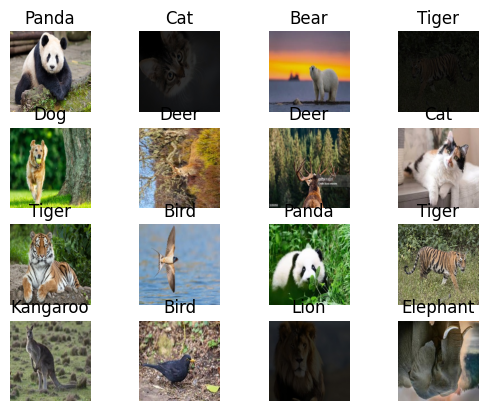

The total images count : 1646


In [18]:
import matplotlib.pyplot as plt
from PIL import Image
list_of_images=list(Path("animal_data").rglob("*.jpg"))
import random
fig,ax=plt.subplots(nrows=4,ncols=4,sharex=True,sharey=True)
random.seed(42)
random_image_path=random.sample(list_of_images,k=16)
k=0

for i in range(4):
        for j in range(4):
                ax[i,j].axis("off")
                ax[i,j].imshow(Image.open(random_image_path[k]))
                
                ax[i,j].set_title(f"{random_image_path[k].parent.stem}")
                k=k+1

plt.show()
print(f"The total images count : {list_of_images.__len__()}")

ADDING TO THE LIST

In [19]:
dir_path="animal_data"
animal_classes=[]
import pandas as pd
animal_df=pd.DataFrame(columns=["image_paths","labels"])
for label in os.listdir(dir_path):
        animal_classes.append(label)
        for images in os.listdir(f"{dir_path}/{label}"):
                animal_df.loc[len(animal_df)]=[f"{dir_path}/{label}/{images}",label]
                
print(animal_df.shape)
print(f"The value  coutns of animals : ....")
print(animal_df["labels"].value_counts())
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
encoder.fit_transform(animal_df["labels"])
print(f"The sample of dataframe : ")
print(animal_df.sample(5))

(1944, 2)
The value  coutns of animals : ....
labels
Bird        137
Zebra       137
Panda       135
Elephant    133
Cow         131
Lion        131
Horse       130
Dolphin     129
Giraffe     129
Tiger       129
Deer        127
Kangaroo    126
Bear        125
Cat         123
Dog         122
Name: count, dtype: int64
The sample of dataframe : 
                              image_paths   labels
1105  animal_data/Giraffe/Giraffe_27.jpeg  Giraffe
271          animal_data/Cat/Cat_11_3.jpg      Cat
205        animal_data/Bird/Bird_26_2.jpg     Bird
656          animal_data/Dog/Dog_13_2.jpg      Dog
455          animal_data/Cow/Cow_25_2.jpg      Cow


In [20]:
import torch as t
from torchvision import datasets,transforms
from torch.utils.data import DataLoader,Dataset


In [21]:
train_dataframe=animal_df.sample(frac=0.8)
test_dataframe=animal_df.drop(train_dataframe.index)

In [22]:
train_dataframe["labels"].value_counts()

labels
Zebra       117
Bird        112
Cow         108
Cat         108
Giraffe     107
Panda       107
Dog         105
Lion        104
Deer        101
Kangaroo    100
Horse       100
Elephant     99
Dolphin      96
Bear         96
Tiger        95
Name: count, dtype: int64

In [23]:
test_dataframe["labels"].value_counts()

labels
Elephant    34
Tiger       34
Dolphin     33
Horse       30
Bear        29
Panda       28
Lion        27
Deer        26
Kangaroo    26
Bird        25
Cow         23
Giraffe     22
Zebra       20
Dog         17
Cat         15
Name: count, dtype: int64

In [24]:
class Datasetter(Dataset):
        def __init__(self,dataframe,transforms):
                self.dataframe=dataframe
                self.transforms=transforms
                self.labels=t.tensor(encoder.transform(animal_df["labels"]))
        def __len__(self):
                return self.dataframe.shape[0]
        def __getitem__(self,idx):
                img_path=self.dataframe.iloc[idx,0]
                label=self.labels[idx]
                image=Image.open(img_path).convert("RGB")
                if self.transforms:
                        image=self.transforms(image)

                return image,label

In [25]:
train_dataset=Datasetter(dataframe=train_dataframe,transforms=transforms.Compose(
        [
                transforms.RandomHorizontalFlip(p=0.2),
                transforms.ToTensor(),
                transforms.ConvertImageDtype(t.float64)

        ]
))
test_dataset=Datasetter(dataframe=test_dataframe,transforms=transforms.Compose(
        [
                transforms.RandomHorizontalFlip(p=0.2),
                transforms.ToTensor(),
                transforms.ConvertImageDtype(t.float64)

        ]
))

In [26]:
print(f' The length of the train dataset is {train_dataset.__len__()}')
print(f' The length of the train dataset is {test_dataset.__len__()}')

print(f"The labels of train dataset is {train_dataset.labels}")
print(f"The labels of train dataset is {test_dataset.labels}")

 The length of the train dataset is 1555
 The length of the train dataset is 389
The labels of train dataset is tensor([ 0,  0,  0,  ..., 14, 14, 14], dtype=torch.int32)
The labels of train dataset is tensor([ 0,  0,  0,  ..., 14, 14, 14], dtype=torch.int32)


In [27]:
train_dataloader=DataLoader(
        shuffle=True,
        batch_size=32,
        dataset=train_dataset,
        drop_last=True,
        num_workers=0,

)
test_dataloader=DataLoader(
        shuffle=True,
        batch_size=32,
        dataset=test_dataset,
        drop_last=True,
        num_workers=0
)

In [28]:
print(f"Number of batches in train data loader : {train_dataloader.__len__()}")
print(f"Number of batches in test data loader : {test_dataloader.__len__()}")
count=1
for x,y in train_dataloader:
        print(count)
        print(x.shape)
        print(y.shape)
        count=count+1
        print("="*80)

Number of batches in train data loader : 48
Number of batches in test data loader : 12
1
torch.Size([32, 3, 224, 224])
torch.Size([32])
2
torch.Size([32, 3, 224, 224])
torch.Size([32])
3
torch.Size([32, 3, 224, 224])
torch.Size([32])
4
torch.Size([32, 3, 224, 224])
torch.Size([32])
5
torch.Size([32, 3, 224, 224])
torch.Size([32])
6
torch.Size([32, 3, 224, 224])
torch.Size([32])
7
torch.Size([32, 3, 224, 224])
torch.Size([32])
8
torch.Size([32, 3, 224, 224])
torch.Size([32])
9
torch.Size([32, 3, 224, 224])
torch.Size([32])
10
torch.Size([32, 3, 224, 224])
torch.Size([32])
11
torch.Size([32, 3, 224, 224])
torch.Size([32])
12
torch.Size([32, 3, 224, 224])
torch.Size([32])
13
torch.Size([32, 3, 224, 224])
torch.Size([32])
14
torch.Size([32, 3, 224, 224])
torch.Size([32])
15
torch.Size([32, 3, 224, 224])
torch.Size([32])
16
torch.Size([32, 3, 224, 224])
torch.Size([32])
17
torch.Size([32, 3, 224, 224])
torch.Size([32])
18
torch.Size([32, 3, 224, 224])
torch.Size([32])
19
torch.Size([32, 3, 

In [42]:
#TIME FOR CREATION OF MODEL
class Model(t.nn.Module):
        def __init__(self):
                super().__init__()
                self.layer1=t.nn.Sequential(
                        t.nn.Conv2d(
                                in_channels=3,
                                out_channels=9,
                                stride=4,
                                padding=0,
                                kernel_size=16
                        ),
                        t.nn.ReLU(),
                        t.nn.Conv2d(
                                in_channels=9,
                                out_channels=9,
                                stride=4,
                                padding=0,
                                kernel_size=16
                        ),
                        t.nn.ReLU(),
                        t.nn.MaxPool2d(3)

                )
                self.layer2=t.nn.Sequential(
                        t.nn.Flatten(),
                        t.nn.Linear(9*3*3,animal_classes.__len__())
                        
                        
                )
        def forward(self,x):
                x=self.layer1(x)
                return self.layer2(x)

In [43]:
from torchinfo import summary

Model_for_animal_class=Model()
summary(Model_for_animal_class,input_size=(32,3,224,224), col_names=["input_size","output_size","trainable","num_params"])

Layer (type:depth-idx)                   Input Shape               Output Shape              Trainable                 Param #
Model                                    [32, 3, 224, 224]         [32, 15]                  True                      --
├─Sequential: 1-1                        [32, 3, 224, 224]         [32, 9, 3, 3]             True                      --
│    └─Conv2d: 2-1                       [32, 3, 224, 224]         [32, 9, 53, 53]           True                      6,921
│    └─ReLU: 2-2                         [32, 9, 53, 53]           [32, 9, 53, 53]           --                        --
│    └─Conv2d: 2-3                       [32, 9, 53, 53]           [32, 9, 10, 10]           True                      20,745
│    └─ReLU: 2-4                         [32, 9, 10, 10]           [32, 9, 10, 10]           --                        --
│    └─MaxPool2d: 2-5                    [32, 9, 10, 10]           [32, 9, 3, 3]             --                        --
├─Sequential

In [44]:
list(t.numel(param) for param in Model_for_animal_class.parameters())


[6912, 9, 20736, 9, 1215, 15]

In [59]:
optimizer=t.optim.Adam(params=Model_for_animal_class.parameters(),lr=1e-5)


lossfn=t.nn.CrossEntropyLoss()

In [60]:
# model training
import pyttsx3

Model_for_animal_class.to(t.float32)


epochs=5
epochlist=[]
train_losslist=[]
test_losslist=[]
train_acc=[]
test_acc=[]

loss_train=0
loss_test=0
acc_train=0
acc_test=0

for epoch in range(epochs):
        print("="*160)
        loss_train = 0
        acc_train = 0
        loss_test = 0
        acc_test = 0
        for index,(X,y) in enumerate(train_dataloader):
                Model_for_animal_class.train()
                X=X.to(t.float32)
                y_preds=Model_for_animal_class(X)
                y=y.to(t.long)
                loss=lossfn(y_preds,y)
                acc_train+=((y_preds.argmax(dim=1)==y).sum().item())
                loss_train+=(float(loss)*len(X))
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
        train_losslist.append(loss_train/len(train_dataloader.dataset))
        train_acc.append(acc_train/len(train_dataloader.dataset))
        for index,(X,y) in enumerate(test_dataloader):
                Model_for_animal_class.eval()
                with t.inference_mode():
                        y=y.to(t.long)
                        X=X.to(t.float32)
                        y_preds=Model_for_animal_class(X)
                        acc_test+=(y==y_preds.argmax(dim=1)).sum().item()
                        loss_test+=float(lossfn(y_preds,y))*len(X)
        test_losslist.append(float(loss_test)/len(test_dataloader.dataset))
        test_acc.append(acc_test/len(test_dataloader.dataset))
        print(f"Epoch : {epoch} === "
              f"Train accuracy : {train_acc[epoch]}  "
              f"Test accuracy : {test_acc[epoch]}  "
              f"Train loss : {train_losslist[epoch]}  "
              f"Test loss : {test_losslist[epoch]}   "
              )
        
        engine=pyttsx3.init()
        voices=engine.getProperty("voices")
        engine.setProperty("voice",voices[2].id)
        engine.say(f"Epoch {epoch} is successfully completed")
        engine.runAndWait()
        del engine





Epoch : 0 === Train accuracy : 0.12347266881028938  Test accuracy : 0.07969151670951156  Train loss : 2.455369111579331  Test loss : 2.4849038602147435   
Epoch : 1 === Train accuracy : 0.12475884244372991  Test accuracy : 0.08483290488431877  Train loss : 2.453550170702183  Test loss : 2.483842295668732   
Epoch : 2 === Train accuracy : 0.12797427652733118  Test accuracy : 0.07969151670951156  Train loss : 2.4526431558983117  Test loss : 2.481392024415318   
Epoch : 3 === Train accuracy : 0.1292604501607717  Test accuracy : 0.07969151670951156  Train loss : 2.4515152468175367  Test loss : 2.4846273387918743   
Epoch : 4 === Train accuracy : 0.12604501607717042  Test accuracy : 0.08226221079691516  Train loss : 2.449288861927879  Test loss : 2.485789654493945   


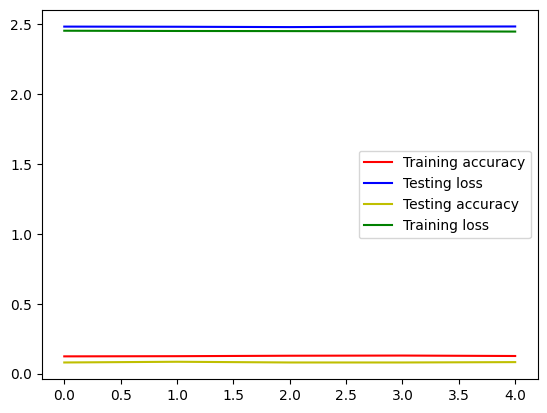

In [61]:
plt.plot(train_acc,c="r",label="Training accuracy")
plt.plot(test_losslist,c="b",label="Testing loss")
plt.plot(test_acc,c="y",label="Testing accuracy")
plt.plot(train_losslist,c="g",label="Training loss")

plt.legend()
plt.show()

In [ ]:
#our model is performing worse we need to use many morelayers or more number of epochs or another optimizer or other learning rate